In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data  = pd.read_csv(r'C:\Users\patri\Downloads\survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data.shape

(309, 16)

In [5]:
data.isnull().sum()

#no missing data

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
#transform lung cancer column from Yes/NO to yes=0,no=1

data.replace({'LUNG_CANCER' : {'YES':0,'NO':1}}, inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [8]:
data['LUNG_CANCER'].value_counts()

0    270
1     39
Name: LUNG_CANCER, dtype: int64

In [12]:
#label encoding

data.replace({'GENDER' : {'M':0,'F':1}}, inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

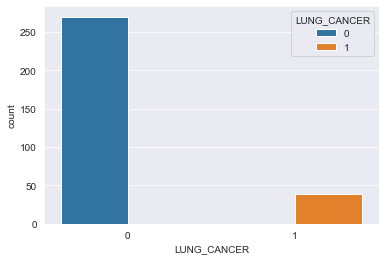

In [15]:
#data visualization
sns.set_style('darkgrid')

sns.countplot(x='LUNG_CANCER', hue='LUNG_CANCER',data=data)

#yes=0 vs no=1

<AxesSubplot:xlabel='GENDER', ylabel='count'>

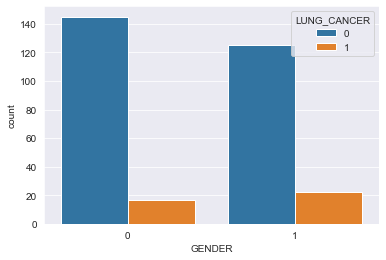

In [16]:
sns.countplot(x='GENDER', hue='LUNG_CANCER',data=data)

#by gender lung cancer cases

C:\Users\patri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\patri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\patri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

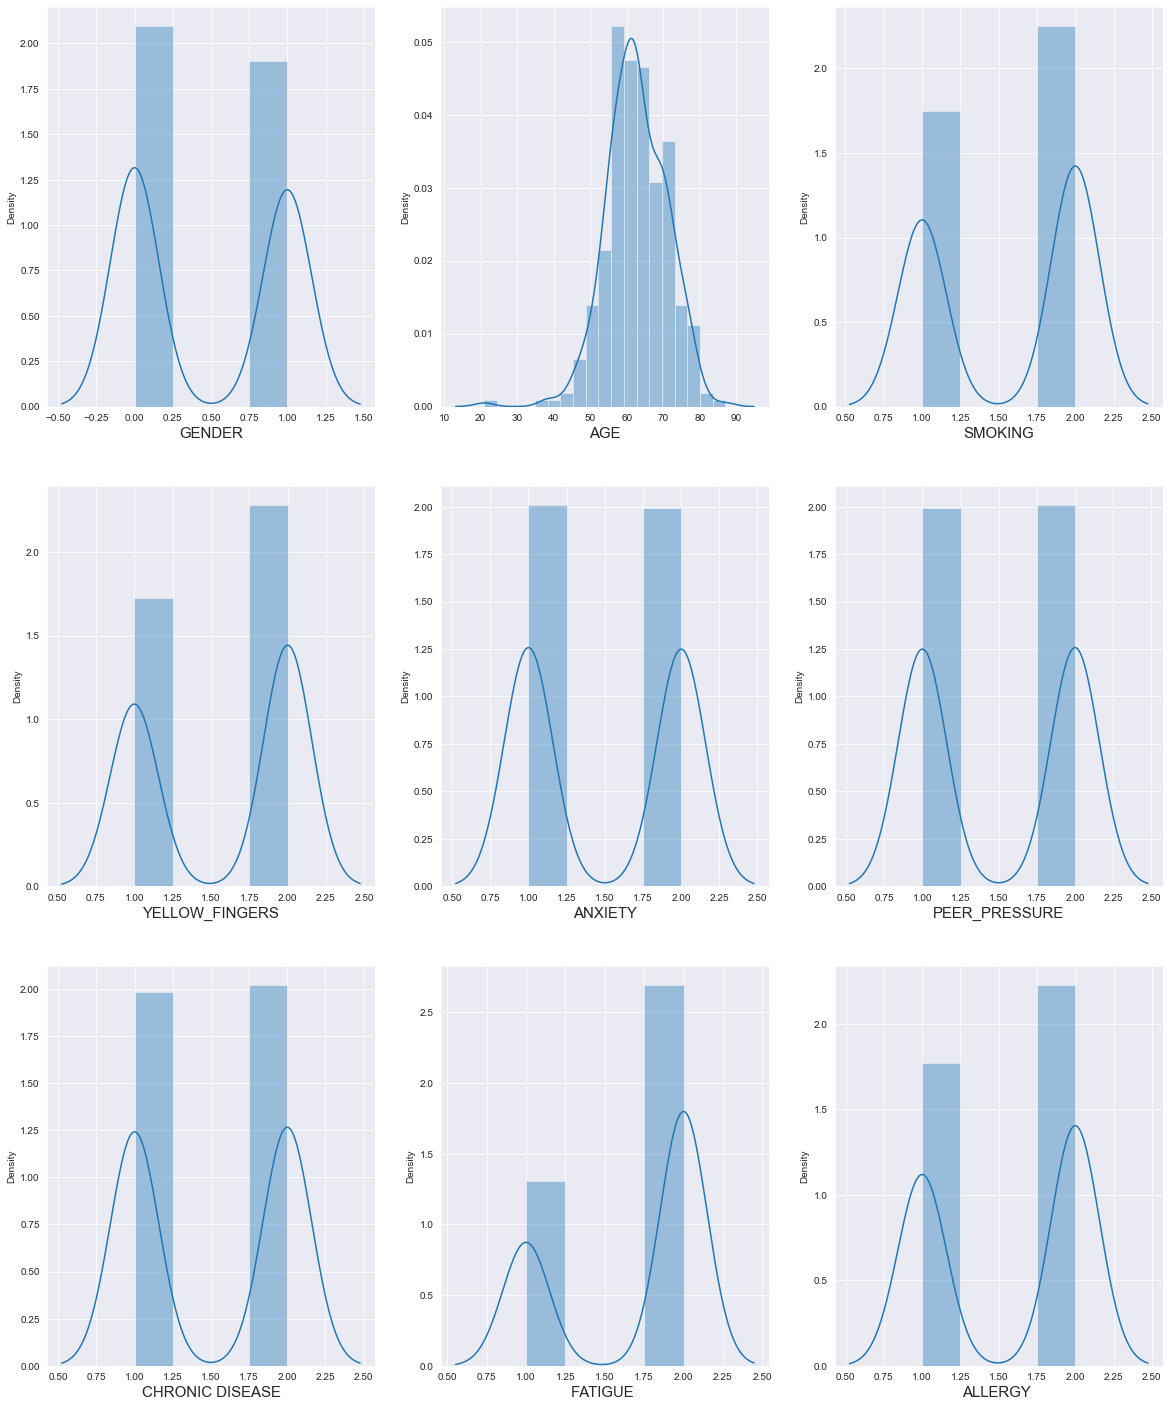

In [18]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

#data distribution over each column

In [ ]:
#model prep

In [19]:
# separating the data and target

X = data.drop(columns=['LUNG_CANCER'],axis=1)
y = data['LUNG_CANCER']

In [20]:
print("The shape of X is " , X.shape)
print("The shape of Y is " , y.shape)

The shape of X is  (309, 15)
The shape of Y is  (309,)


In [22]:
# separating into train and testing

X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,Y_train.shape)
print("Shape of Y_test  is " ,Y_test.shape)

Shape of X_train is  (247, 15)
Shape of X_test  is  (62, 15)
Shape of Y_train is  (247,)
Shape of Y_test  is  (62,)


In [23]:
#  Y train & test values

print(Y_train.value_counts())
print(Y_test.value_counts())

0    216
1     31
Name: LUNG_CANCER, dtype: int64
0    54
1     8
Name: LUNG_CANCER, dtype: int64


In [27]:
#scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(Y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.951417004048583
Test Accuracy of Logistic Regression Model is 0.9193548387096774


In [30]:
# confusion matrix 
confusion_matrix(Y_test, y_pred)

array([[53,  1],
       [ 4,  4]], dtype=int64)

In [31]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.80      0.50      0.62         8

    accuracy                           0.92        62
   macro avg       0.86      0.74      0.79        62
weighted avg       0.91      0.92      0.91        62



In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(Y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.9230769230769231
Test Accuracy of KNN Model is 0.9032258064516129


In [34]:
# confusion matrix 

confusion_matrix(Y_test, y_pred)

array([[52,  2],
       [ 4,  4]], dtype=int64)

In [35]:
# classification report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.67      0.50      0.57         8

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [37]:
svc = SVC()
svc.fit(X_train, Y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.9595141700404858
Test Accuracy of SVC Model is 0.9032258064516129


In [38]:
# confusion matrix

confusion_matrix(Y_test, y_pred)

array([[52,  2],
       [ 4,  4]], dtype=int64)

In [39]:
# classification report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.67      0.50      0.57         8

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.9193548387096774


In [42]:
# confusion matrix

confusion_matrix(Y_test, y_pred)

array([[50,  4],
       [ 1,  7]], dtype=int64)

In [43]:
# classification report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.64      0.88      0.74         8

    accuracy                           0.92        62
   macro avg       0.81      0.90      0.84        62
weighted avg       0.94      0.92      0.92        62



In [45]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [46]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.8705306122448979


In [47]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.9109311740890689
Test Accuracy of Decesion Tree Model is 0.8870967741935484


[Text(533.5875, 498.3, 'X[8] <= -0.11\ngini = 0.22\nsamples = 247\nvalue = [216, 31]'),
 Text(355.725, 407.70000000000005, 'X[13] <= 0.045\ngini = 0.38\nsamples = 110\nvalue = [82, 28]'),
 Text(209.25, 317.1, 'X[11] <= -0.185\ngini = 0.489\nsamples = 54\nvalue = [31, 23]'),
 Text(125.55000000000001, 226.5, 'X[3] <= -0.152\ngini = 0.49\nsamples = 28\nvalue = [12, 16]'),
 Text(83.7, 135.89999999999998, 'X[1] <= -0.16\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(41.85, 45.299999999999955, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(125.55000000000001, 45.299999999999955, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(167.4, 135.89999999999998, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(292.95, 226.5, 'X[10] <= -0.127\ngini = 0.393\nsamples = 26\nvalue = [19, 7]'),
 Text(251.10000000000002, 135.89999999999998, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(334.8, 135.89999999999998, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(502.20000000000005

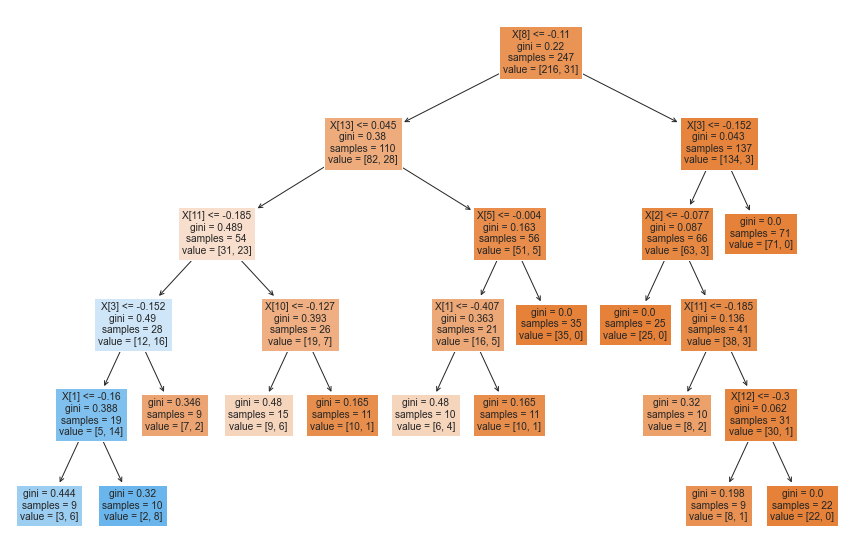

In [49]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [51]:
rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, Y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8785425101214575
Test Accuracy of Random Forest Model is 0.8709677419354839


In [53]:
k_model = KNeighborsClassifier(n_neighbors=16)
kfitModel = k_model.fit(X_train, Y_train)

# accuracy score on training data

kX_train_prediction = kfitModel.predict(X_train)
training_data_accuray = accuracy_score(kX_train_prediction,Y_train)
print('Accuracy on training data  : ', training_data_accuray)

# accuracy score on testing data
kX_test_prediction = kfitModel.predict(X_test)
kx_lgr_test_data_accuray = accuracy_score(kX_test_prediction,Y_test)
print('Accuracy on test data      : ', kx_lgr_test_data_accuray)

Accuracy on training data  :  0.8866396761133604
Accuracy on test data      :  0.9032258064516129


In [55]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\patri\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.87053061 0.87053061 0.87053061 0.87053061 0.87053061 0.87053061
 0.87861224 0.87461224 0.87453061 0.87461224 0.87861224 0.87453061
 0.88677551 0.89477551 0.87853061 0.88661224 0.88661224 0.87844898
 0.89461224 0.87853061 0.89061224 0.87844898 0.88653061 0.88653061
        nan        nan        nan        nan        nan        nan
 0.88269388 0.88677551 0.87853061 0.87444898 0.88669388 0.89077551
 0.89477551 0.88669388 0.88661224 0.88236735 0.88636735 0.88228571
 0.88644898 0.89053061 0.88244898 0.90253061 0.90669388 0.89869388
 0.87044898 0.87861224 0.89053061 0.89453061 0.88653061 0.88253061
 0.75330612 0.73289796 0.75738776 0.73297959 0.75330612 0.74106122]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                min_samples_leaf=9)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 180}
0.9066938775510204


In [57]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME.R', learning_rate = 0.1, n_estimators = 180)
ada.fit(X_train, Y_train)

ada_train_acc = accuracy_score(Y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Ada Boost Model is {ada_train_acc}")
print(f"Test Accuracy of Ada Boost Model is {ada_test_acc}")

Training Accuracy of Ada Boost Model is 1.0
Test Accuracy of Ada Boost Model is 0.8709677419354839


In [58]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[54,  0],
       [ 8,  0]], dtype=int64)

In [59]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       0.00      0.00      0.00         8

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62



C:\Users\patri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
